In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

Exercise 1.1 - POINT A

In [3]:
def square(N,r):
    v = np.empty((N,2))
    ratio1 = 0
    ratio2 = 0
    if r < 1:
        #print("successful choice of r")
        i=0
        j=0
        while i < N:
            v[i] = np.random.rand(2)
            v[i,0] = v[i,0] - 0.5
            v[i,1] = v[i,1] - 0.5
            if mt.sqrt(v[i,0]**2 + v[i,1]**2) < r:
                j+=1
            else:
                j=j
            i+=1
        ratio1 = j/(N*r**2)
        ratio2 = np.pi * (r**2)
        #if abs((ratio1-ratio2)/ratio1) < 0.05:
        #    print("the 2 ratios are close")
        #else:
        #    print("the 2 ratios are not close")

    else:
        print("choose r<1")
    return (ratio1, ratio2)
square(1000,0.5)


(3.18, 0.7853981633974483)

Point B

In [13]:
def var_square(N):
    i=0
    a=np.empty((1,10))
    while i < 10:
        a[0,i] = square(N,0.5)[0]
        i+=1
    var = np.var(a)
    return var
var_square(50)

0.03225599999999998

Point C

daje
daje
daje
daje
daje


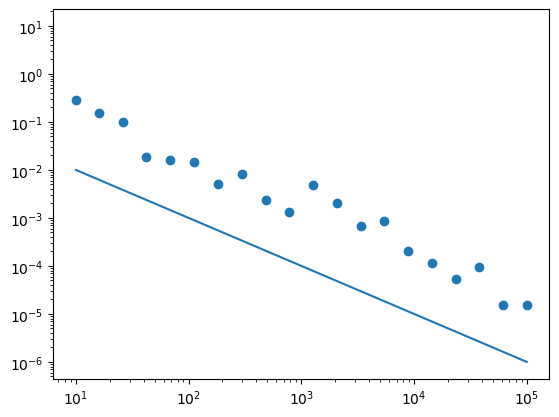

In [29]:
x = np.array(np.logspace(1, 5, 20, dtype=int))
print("daje")
vec_y = np.vectorize(var_square)
print("daje")
def f_inv(x):
    return 0.1/x
vec_yinvsq = np.vectorize(f_inv)
print("daje")
y = vec_y(x)
print("daje")
yy = vec_yinvsq(x)
print("daje")
plt.scatter(x,y)
plt.plot(x,yy)
plt.semilogy(10)
plt.semilogx(10)
#error is of the order of 1/N

$z = \log(y) \\$
$x' = \log(x) \\$ 
$ \implies z(x') = \log(y) = \log(\frac{1}{x}) = \log(\frac{1}{e^{x'}}) = \log(e^{-x'}) = - x'$


Point D

In [11]:
def sum_of_squares(arr):
    return sum([x ** 2 for x in arr])

def vol_d_sphere(d, r):
    return (mt.pi ** (d / 2)) / mt.gamma(d / 2 + 1) * (r ** d)

def d_square(N,r,d):
    v = np.empty((N,d))
    r = r*(2**d)
    ratio1 = 0.
    ratio2 = 0.
    if r < 2**d:
        #print("successful choice of r")
        i=0
        j=0
        while i < N:
            v[i] = np.random.rand(d)*(2**d)
            v[i] = v[i] - (2**(d-1))
            if mt.sqrt(sum_of_squares(v[i])) < r:
                j+=1
            else:
                j=j
            i+=1
        ratio1 = (j/N)
        ratio2 = ((vol_d_sphere(d,r))/((2**d)**d))
        #if abs((ratio1-ratio2)/ratio1) < 0.05:
        #    print("the 2 ratios are close")
        #else:
        #    print("the 2 ratios are not close")
    else:
        print("choose r<2^d")
    return (ratio1, ratio2)
d_square(100000,0.5,10)


(0.00256, 0.00249039457019272)

In [230]:
def var_dsquare(N):
    i=0
    a=np.empty((1,10))
    while i < 10:
        a[0,i] = d_square(N,0.5,10)[0]
        i+=1
    var = np.var(a)
    return var
var_dsquare(2000)

4.5999999999999994e-07

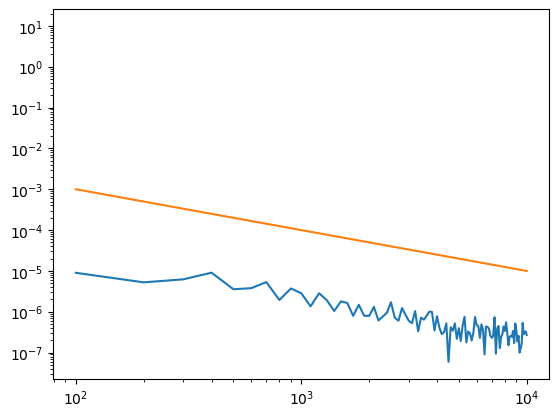

In [236]:
x2 = np.array(np.linspace(100, 10000, 100,dtype=int)) #use logscale
vec_y2 = np.vectorize(var_dsquare)
y2 = vec_y2(x2)
plt.plot(x2,y2)
yy2 = vec_yinvsq(x2)
plt.plot(x2,yy2)
plt.semilogy(10)
plt.semilogx(10)


Exercise 1.2 Point A

In [239]:
def f_1(x):
    return (np.exp(-x)/(1+(x-1)**2))

def I(f,N,b):
    vec_f = np.vectorize(f)
    v = np.random.rand(N)*b
    f_rand = vec_f(v)

    return b * np.mean(f_rand)

print(I(f_1,100,10))

def err_I(f,N,b,m):
    i=0
    a=np.empty((1,m))

    while i < m:
        a[0,i] = I(f,N,b) 
        i+=1
    var = np.var(a)
    return var #scipy integrate to calculate exact value

err_I(f_1,100,10,10)

#error is about (1/N)^1/2

0.5473603212401852


0.025870142396262414

Exercise 1.2 Point B

In [242]:
def G(x): #by hand
    return (1-np.exp(-1.46*x))

#def G_inverse(u): 
    x=2
    if u <= 1:
        while G(x) < u:
            x+=10
        while G(x) >= u:
                x-=0.001
    else:
         print("choose u<=1")
    return x

def G_inverse(u):
     return 1/1.46 * np.log(1/(1-u))

def foverg(x):
     return f_1(x)/(1.46*np.exp(-1.46*x))

def Inew(N,b):
    vec_f = np.vectorize(foverg)
    w = np.random.rand(N)
    vec_Ginv = np.vectorize(G_inverse)
    v = vec_Ginv(w)
    f_rand = vec_f(v)

    return np.mean(f_rand) #non ci va messo b

Inew(1000,10)

0.6938917147421682

Exercise 1.3 - Point A

In [247]:
import metropolis

1.5 -193.068 [0.267756430222213, 0.07356370073982761]
1.6 -194.032 [0.2611639187499946, 0.018630695632531634]
1.7000000000000002 -189.78 [0.30464832110727336, 0.012051929911399677]
1.8000000000000003 -185.724 [0.42103439506173534, 0.05118503571494475]
1.9000000000000004 -178.872 [0.49724330637119396, 0.030231016772816262]
2.0000000000000004 -179.068 [0.568774919999996, 0.039501347703094464]
2.1000000000000005 -171.672 [0.8614654185941027, 0.11547515177361614]
2.2000000000000006 -158.096 [1.0415501553719007, 0.08408391122776133]
2.3000000000000007 -141.232 [1.0814158487712666, 0.08217434765229434]
2.400000000000001 -132.356 [0.9939328472222229, 0.1258739650724936]
2.500000000000001 -97.38 [0.9088679603199994, 0.12314775369597471]
2.600000000000001 -101.176 [0.7865100284023663, 0.07563015230181216]
2.700000000000001 -99.204 [0.699896248010974, 0.052191264473228714]
2.800000000000001 -100.184 [0.5268490244897954, 0.05632051896558117]
2.9000000000000012 -83.212 [0.49869598097502976, 0.0470

ValueError: x and y must have same first dimension, but have shapes (16,) and (1,)

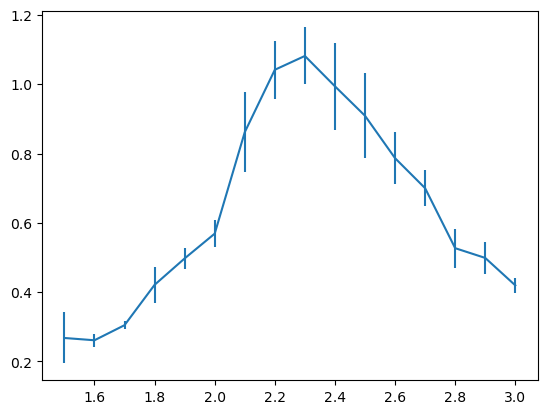

In [248]:
# a)
run metropolis.py

The script plots the specific heat for a range of temperatures around the critical point Tc​. Note that the system is very small (4x4)